In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import talib

In [159]:
df= pd.read_csv('data/ALL.csv')

In [160]:
# df.drop(['{}'],axis=1,inplace=True)

In [161]:
df.index = pd.to_datetime(df["timestamp"])

In [185]:
window_size = 40
df['y'] = (df['nvda_open'] < df['nvda_close']).astype(int)
df['y'] = df['y'].shift(-1)

## 💨 Momentum Indicators
# RSI
df['rsi_14'] = talib.RSI(df['nvda_close'], timeperiod=14)

# Stochastic Oscillator
df['stoch_k'], df['stoch_d'] = talib.STOCH(
    df['nvda_high'], df['nvda_low'], df['nvda_close'],
    fastk_period=14, slowk_period=3, slowd_period=3
)

# MACD
df['macd'], df['macd_signal'], df['macd_hist'] = talib.MACD(
    df['nvda_close'],
    fastperiod=12, slowperiod=26, signalperiod=9
)

## 📈 Trend Indicators
# We calculate the SMA to create our custom feature
sma_20 = talib.SMA(df['nvda_close'], timeperiod=window_size)
df['price_to_sma'] = (df['nvda_close'] - sma_20) / sma_20

## 🌊 Volatility Indicators
# ATR
df['atr_14'] = talib.ATR(
    df['nvda_high'], df['nvda_low'], df['nvda_close'],
    timeperiod=14
)

# Bollinger Bands
upper_bb, middle_bb, lower_bb = talib.BBANDS(
    df['nvda_close'],
    timeperiod=window_size, nbdevup=2, nbdevdn=2
)
# Create the "Bollinger Band Width" feature
df['bb_width'] = (upper_bb - lower_bb) / middle_bb

## 📊 Volume Indicators
# On-Balance Volume (OBV)
df['obv'] = talib.OBV(df['nvda_close'], df['nvda_volume'])
# Create the "OBV Slope" feature (using a 10-period change)
df['obv_slope'] = df['obv'].diff(periods=10)
# df['rsi_lag_1'] = df['rsi_14'].shift(1)
# df['rsi_lag_2'] = df['rsi_14'].shift(2)
# df['price_to_sma_lag_1'] = df['price_to_sma'].shift(1)
# df['bb_width_lag_1'] = df['bb_width'].shift(1)
# df['atr_lag_1'] = df['atr_14'].shift(1)
# df.drop

In [186]:
df["2022-03-03 9:00":]

,timestamp,nvda_open,nvda_high,nvda_low,nvda_close,nvda_volume,amd_open,amd_high,amd_low,amd_close,...,stoch_k,stoch_d,macd,macd_signal,macd_hist,price_to_sma,atr_14,bb_width,obv,obv_slope
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-03-03 09:00:00+00:00,2022-03-03 09:00:00+00:00,24.0095,24.0374,23.9216,23.9735,46180,117.4600,117.50000,116.900,117.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.618000e+04,NaN
2022-03-03 10:00:00+00:00,2022-03-03 10:00:00+00:00,23.9795,23.9975,23.9466,23.9596,9530,117.4000,117.49000,117.200,117.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.665000e+04,NaN
2022-03-03 11:00:00+00:00,2022-03-03 11:00:00+00:00,23.9825,24.0484,23.9456,23.9596,50490,117.3000,117.78000,117.300,117.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.665000e+04,NaN
2022-03-03 12:00:00+00:00,2022-03-03 12:00:00+00:00,23.9945,24.0694,23.9596,24.0574,166470,117.5400,117.94000,117.450,117.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.031200e+05,NaN
2022-03-03 13:00:00+00:00,2022-03-03 13:00:00+00:00,23.9715,24.2750,23.9715,24.2680,776990,117.8001,118.26000,117.432,118.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.801100e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 18:00:00+00:00,2025-06-30 18:00:00+00:00,157.8111,158.0161,156.8311,157.7361,14311666,142.3450,142.43000,141.400,141.71,...,74.995658,75.831163,0.562108,0.721528,-0.159420,0.006255,1.188289,0.029528,1.328194e+10,-28124420.0
2025-06-30 19:00:00+00:00,2025-06-30 19:00:00+00:00,157.7411,158.6510,157.6611,157.8611,26770205,141.7200,142.24000,141.220,141.89,...,72.165016,75.129133,0.528390,0.682900,-0.154510,0.006868,1.174118,0.029848,1.330871e+10,-1354215.0
2025-06-30 20:00:00+00:00,2025-06-30 20:00:00+00:00,157.8611,158.6600,155.9600,157.7811,72869000,141.8900,144.01955,141.010,141.70,...,69.890375,72.350350,0.489569,0.644234,-0.154664,0.006127,1.283110,0.030044,1.323584e+10,-74223215.0


In [187]:
df['timestamp']

timestamp
2022-03-03 09:00:00+00:00    2022-03-03 09:00:00+00:00
2022-03-03 10:00:00+00:00    2022-03-03 10:00:00+00:00
2022-03-03 11:00:00+00:00    2022-03-03 11:00:00+00:00
2022-03-03 12:00:00+00:00    2022-03-03 12:00:00+00:00
2022-03-03 13:00:00+00:00    2022-03-03 13:00:00+00:00
                                       ...            
2025-06-30 18:00:00+00:00    2025-06-30 18:00:00+00:00
2025-06-30 19:00:00+00:00    2025-06-30 19:00:00+00:00
2025-06-30 20:00:00+00:00    2025-06-30 20:00:00+00:00
2025-06-30 21:00:00+00:00    2025-06-30 21:00:00+00:00
2025-06-30 22:00:00+00:00    2025-06-30 22:00:00+00:00
Name: timestamp, Length: 13325, dtype: object

In [188]:
# 2022-3-1 --> 2025-6

In [189]:
df.columns

Index(['timestamp', 'nvda_open', 'nvda_high', 'nvda_low', 'nvda_close',
       'nvda_volume', 'amd_open', 'amd_high', 'amd_low', 'amd_close',
       'amd_volume', 'intc_open', 'intc_high', 'intc_low', 'intc_close',
       'intc_volume', 'spy_open', 'spy_high', 'spy_low', 'spy_close',
       'spy_volume', 'dia_open', 'dia_high', 'dia_low', 'dia_close',
       'dia_volume', 'iwm_open', 'iwm_high', 'iwm_low', 'iwm_close',
       'iwm_volume', 'insider_traded_shares_3d_shifted', 'btc_open',
       'btc_high', 'btc_low', 'btc_close', 'btc_volume', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'gold_volume',
       'overall_sentiment_score', 'nvda_sentiment_score',
       'nvda_relevance_score', 'y', 'rsi_14', 'stoch_k', 'stoch_d', 'macd',
       'macd_signal', 'macd_hist', 'price_to_sma', 'atr_14', 'bb_width', 'obv',
       'obv_slope'],
      dtype='object')

In [190]:
df[['amd_open', 'amd_high', 'amd_low', 'amd_close',
       'amd_volume', 'intc_open', 'intc_high', 'intc_low', 'intc_close',
       'intc_volume', 'spy_open', 'spy_high', 'spy_low', 'spy_close',
       'spy_volume', 'dia_open', 'dia_high', 'dia_low', 'dia_close',
       'dia_volume', 'iwm_open', 'iwm_high', 'iwm_low', 'iwm_close',
       'iwm_volume','btc_open',
       'btc_high', 'btc_low', 'btc_close', 'btc_volume', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'gold_volume']] = df[['amd_open', 'amd_high', 'amd_low', 'amd_close',
       'amd_volume', 'intc_open', 'intc_high', 'intc_low', 'intc_close',
       'intc_volume', 'spy_open', 'spy_high', 'spy_low', 'spy_close',
       'spy_volume', 'dia_open', 'dia_high', 'dia_low', 'dia_close',
       'dia_volume', 'iwm_open', 'iwm_high', 'iwm_low', 'iwm_close',
       'iwm_volume','btc_open',
       'btc_high', 'btc_low', 'btc_close', 'btc_volume', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'gold_volume']].fillna(method='ffill')

/tmp/ipykernel_980410/3073380282.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  'gold_high', 'gold_low', 'gold_close', 'gold_volume']].fillna(method='ffill')


In [191]:
df

,timestamp,nvda_open,nvda_high,nvda_low,nvda_close,nvda_volume,amd_open,amd_high,amd_low,amd_close,...,stoch_k,stoch_d,macd,macd_signal,macd_hist,price_to_sma,atr_14,bb_width,obv,obv_slope
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-03-03 09:00:00+00:00,2022-03-03 09:00:00+00:00,24.0095,24.0374,23.9216,23.9735,46180,117.4600,117.50000,116.900,117.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.618000e+04,NaN
2022-03-03 10:00:00+00:00,2022-03-03 10:00:00+00:00,23.9795,23.9975,23.9466,23.9596,9530,117.4000,117.49000,117.200,117.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.665000e+04,NaN
2022-03-03 11:00:00+00:00,2022-03-03 11:00:00+00:00,23.9825,24.0484,23.9456,23.9596,50490,117.3000,117.78000,117.300,117.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.665000e+04,NaN
2022-03-03 12:00:00+00:00,2022-03-03 12:00:00+00:00,23.9945,24.0694,23.9596,24.0574,166470,117.5400,117.94000,117.450,117.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.031200e+05,NaN
2022-03-03 13:00:00+00:00,2022-03-03 13:00:00+00:00,23.9715,24.2750,23.9715,24.2680,776990,117.8001,118.26000,117.432,118.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.801100e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 18:00:00+00:00,2025-06-30 18:00:00+00:00,157.8111,158.0161,156.8311,157.7361,14311666,142.3450,142.43000,141.400,141.71,...,74.995658,75.831163,0.562108,0.721528,-0.159420,0.006255,1.188289,0.029528,1.328194e+10,-28124420.0
2025-06-30 19:00:00+00:00,2025-06-30 19:00:00+00:00,157.7411,158.6510,157.6611,157.8611,26770205,141.7200,142.24000,141.220,141.89,...,72.165016,75.129133,0.528390,0.682900,-0.154510,0.006868,1.174118,0.029848,1.330871e+10,-1354215.0
2025-06-30 20:00:00+00:00,2025-06-30 20:00:00+00:00,157.8611,158.6600,155.9600,157.7811,72869000,141.8900,144.01955,141.010,141.70,...,69.890375,72.350350,0.489569,0.644234,-0.154664,0.006127,1.283110,0.030044,1.323584e+10,-74223215.0


In [192]:
# df["2022-03-03 9:00":][['overall_sentiment_score', 'nvda_sentiment_score',
#        'nvda_relevance_score', 'y', 'rsi_14', 'stoch_k', 'stoch_d', 'macd',
#        'macd_signal', 'macd_hist', 'price_to_sma', 'atr_14', 'bb_width', 'obv',
#        'obv_slope', 'rsi_lag_1', 'rsi_lag_2', 'price_to_sma_lag_1',
#        'bb_width_lag_1', 'atr_lag_1']].isnull().sum()

In [193]:
df.dropna(inplace=True)

In [194]:
X = df.drop('y',axis=1)
# df
y = df['y']

In [195]:
y

timestamp
2022-03-07 16:00:00+00:00    0.0
2022-03-07 17:00:00+00:00    0.0
2022-03-07 18:00:00+00:00    0.0
2022-03-07 19:00:00+00:00    0.0
2022-03-07 20:00:00+00:00    0.0
                            ... 
2025-06-30 17:00:00+00:00    0.0
2025-06-30 18:00:00+00:00    1.0
2025-06-30 19:00:00+00:00    0.0
2025-06-30 20:00:00+00:00    0.0
2025-06-30 21:00:00+00:00    0.0
Name: y, Length: 13285, dtype: float64

In [196]:
X.drop('timestamp',axis=1,inplace=True)

In [197]:
# window_size = 24

# Create list of windows
windows = []
for i in range(len(X) - window_size + 1):
    # Take 30 consecutive rows for all columns, flatten them into 1D array
    window = X.iloc[i:i + window_size].values.flatten()
    windows.append(window)

# Create new column names (e.g., A_0, A_1, ..., B_0, B_1, ...)
cols = []
for col in X.columns:
    for j in range(window_size):
        cols.append(f"{col}_{j}")

# Make new DataFrame
X_new = pd.DataFrame(windows, columns=cols)

# print(df_windows.head())

In [198]:
y_new = y[window_size - 1:].reset_index(drop=True)
X_new = X_new.reset_index(drop=True)

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler



X_train, X_temp, y_train, y_temp = train_test_split(
    X_new, y_new, test_size=0.3, random_state=42, shuffle=False
)

# Split the 30% temp data into validation and test (e.g. 15% val, 15% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False
)

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Train size: {len(X_train_scaled)}")
print(f"Validation size: {len(X_val_scaled)}")
print(f"Test size: {len(X_test_scaled)}")

Train size: 9272
Validation size: 1987
Test size: 1987


In [217]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

/home/jupyter-st125842/.local/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [10:56:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [218]:
y_prob = model.predict_proba(X_val_scaled)[:,1]


Best threshold: 0.6374
Accuracy at best threshold: 0.5491
Accuracy (best threshold): 0.5491
Confusion Matrix:
 [[965 110]
 [786 126]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.90      0.68      1075
         1.0       0.53      0.14      0.22       912

    accuracy                           0.55      1987
   macro avg       0.54      0.52      0.45      1987
weighted avg       0.54      0.55      0.47      1987

Accuracy (best threshold): 0.5310
Confusion Matrix:
 [[824 251]
 [681 231]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.77      0.64      1075
         1.0       0.48      0.25      0.33       912

    accuracy                           0.53      1987
   macro avg       0.51      0.51      0.49      1987
weighted avg       0.52      0.53      0.50      1987



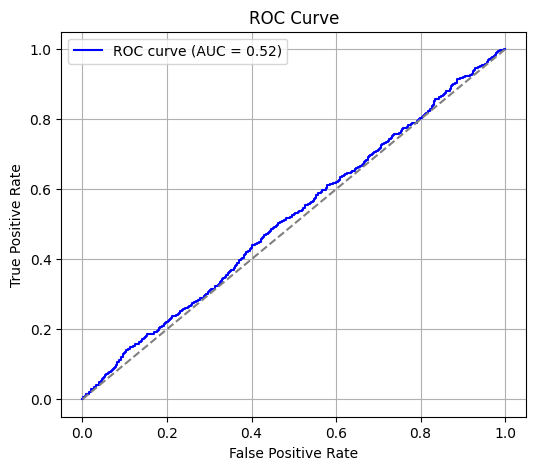

In [220]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# --- Find best threshold for max accuracy ---
best_acc = 0
best_thresh = 0.5
for thresh in thresholds:
    y_pred_custom = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_val, y_pred_custom)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh

print(f"Best threshold: {best_thresh:.4f}")
print(f"Accuracy at best threshold: {best_acc:.4f}")

y_pred_best = (y_prob >= best_thresh).astype(int)

# Evaluate
acc = accuracy_score(y_val, y_pred_best)
cm = confusion_matrix(y_val, y_pred_best)
report = classification_report(y_val, y_pred_best)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

y_pred = (y_prob >= 0.5).astype(int)

# Evaluate
acc = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


# --- Plot ROC curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

Accuracy (best threshold): 0.5476
Confusion Matrix:
 [[773 306]
 [593 315]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.72      0.63      1079
         1.0       0.51      0.35      0.41       908

    accuracy                           0.55      1987
   macro avg       0.54      0.53      0.52      1987
weighted avg       0.54      0.55      0.53      1987

Accuracy (best threshold): 0.5471
Confusion Matrix:
 [[631 448]
 [452 456]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.58      0.58      1079
         1.0       0.50      0.50      0.50       908

    accuracy                           0.55      1987
   macro avg       0.54      0.54      0.54      1987
weighted avg       0.55      0.55      0.55      1987



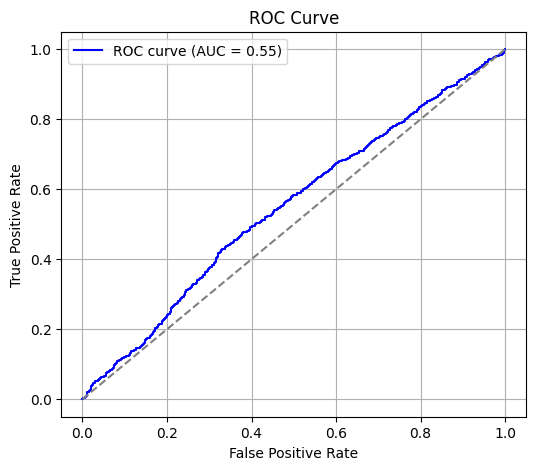

In [222]:

y_prob = model.predict_proba(X_test_scaled)[:,1]

y_pred_best = (y_prob >= 0.6374).astype(int)

# Evaluate
acc = accuracy_score(y_test, y_pred_best)
cm = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

y_pred = (y_prob >= 0.5).astype(int)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


# --- Plot ROC curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [223]:
from sklearn.ensemble import RandomForestClassifier


In [224]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# --- Predict probabilities ---


Best threshold: 0.5750
Accuracy at best threshold: 0.5415
Accuracy (best threshold): 0.5415
Confusion Matrix:
 [[1045   30]
 [ 881   31]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.97      0.70      1075
         1.0       0.51      0.03      0.06       912

    accuracy                           0.54      1987
   macro avg       0.53      0.50      0.38      1987
weighted avg       0.53      0.54      0.41      1987

Accuracy (best threshold): 0.4836
Confusion Matrix:
 [[461 614]
 [412 500]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.43      0.47      1075
         1.0       0.45      0.55      0.49       912

    accuracy                           0.48      1987
   macro avg       0.49      0.49      0.48      1987
weighted avg       0.49      0.48      0.48      1987



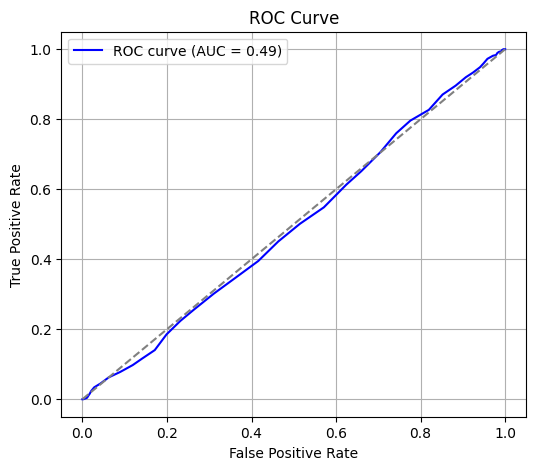

In [225]:
y_prob = rf_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# --- Find best threshold for max accuracy ---
best_acc = 0
best_thresh = 0.5
for thresh in thresholds:
    y_pred_custom = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_val, y_pred_custom)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh

print(f"Best threshold: {best_thresh:.4f}")
print(f"Accuracy at best threshold: {best_acc:.4f}")

y_pred_best = (y_prob >= best_thresh).astype(int)

# Evaluate
acc = accuracy_score(y_val, y_pred_best)
cm = confusion_matrix(y_val, y_pred_best)
report = classification_report(y_val, y_pred_best)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

y_pred = (y_prob >= 0.5).astype(int)

# Evaluate
acc = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


# --- Plot ROC curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

Accuracy (best threshold): 0.5576
Confusion Matrix:
 [[716 363]
 [516 392]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.66      0.62      1079
         1.0       0.52      0.43      0.47       908

    accuracy                           0.56      1987
   macro avg       0.55      0.55      0.55      1987
weighted avg       0.55      0.56      0.55      1987

Accuracy (best threshold): 0.5471
Confusion Matrix:
 [[631 448]
 [452 456]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.58      0.58      1079
         1.0       0.50      0.50      0.50       908

    accuracy                           0.55      1987
   macro avg       0.54      0.54      0.54      1987
weighted avg       0.55      0.55      0.55      1987



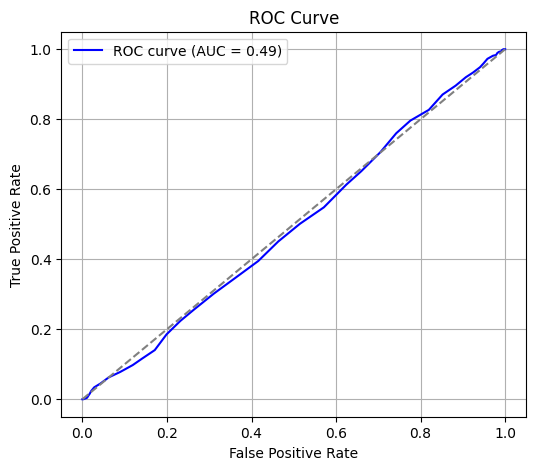

In [226]:
# y_prob = model.predict_proba(X_test_scaled)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# # --- Find best threshold for max accuracy ---
# best_acc = 0
# best_thresh = 0.5
# for thresh in thresholds:
#     y_pred_custom = (y_prob >= thresh).astype(int)
#     acc = accuracy_score(y_test, y_pred_custom)
#     if acc > best_acc:
#         best_acc = acc
#         best_thresh = thresh

# print(f"Best threshold: {best_thresh:.4f}")
# print(f"Accuracy at best threshold: {best_acc:.4f}")
y_prob = model.predict_proba(X_test_scaled)[:,1]

y_pred_best = (y_prob >= 0.5750).astype(int)

# Evaluate
acc = accuracy_score(y_test, y_pred_best)
cm = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

y_pred = (y_prob >= 0.5).astype(int)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


# --- Plot ROC curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [227]:
import lightgbm as lgb


In [231]:
lgb_train = lgb.Dataset(X_train_scaled, y_train)
lgb_eval = lgb.Dataset(X_val_scaled, y_val, reference=lgb_train)
# lgb_eval = lgb.Dataset(X_test_scaled, y_test, reference=lgb_train)

In [232]:
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_logloss', # Evaluation metric
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1 # Suppress verbose output
}

In [236]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100, # Number of boosting rounds
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(10)]) # Early stopping to prevent overfitting

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.685657


In [239]:
y_prob = gbm.predict(X_val_scaled, num_iteration=gbm.best_iteration)
# y_pred = (y_pred_proba > 0.5).astype(int) # For binary classification

Best threshold: 0.5182
Accuracy at best threshold: 0.5627
Accuracy (best threshold): 0.5627
Confusion Matrix:
 [[920 155]
 [714 198]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.86      0.68      1075
         1.0       0.56      0.22      0.31       912

    accuracy                           0.56      1987
   macro avg       0.56      0.54      0.50      1987
weighted avg       0.56      0.56      0.51      1987

Accuracy (best threshold): 0.5330
Confusion Matrix:
 [[721 354]
 [574 338]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.67      0.61      1075
         1.0       0.49      0.37      0.42       912

    accuracy                           0.53      1987
   macro avg       0.52      0.52      0.51      1987
weighted avg       0.53      0.53      0.52      1987



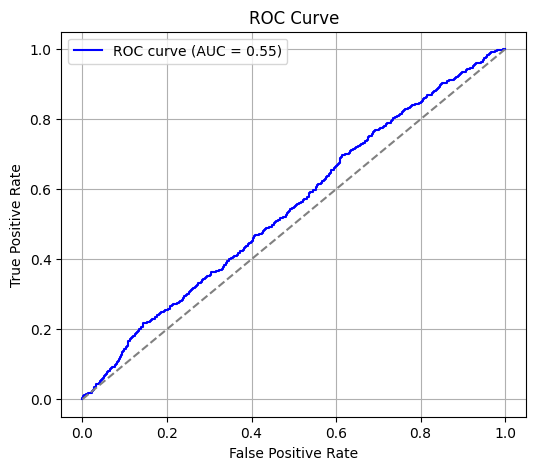

In [240]:
# y_prob = rf_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# --- Find best threshold for max accuracy ---
best_acc = 0
best_thresh = 0.5
for thresh in thresholds:
    y_pred_custom = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_val, y_pred_custom)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh

print(f"Best threshold: {best_thresh:.4f}")
print(f"Accuracy at best threshold: {best_acc:.4f}")

y_pred_best = (y_prob >= best_thresh).astype(int)

# Evaluate
acc = accuracy_score(y_val, y_pred_best)
cm = confusion_matrix(y_val, y_pred_best)
report = classification_report(y_val, y_pred_best)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

y_pred = (y_prob >= 0.5).astype(int)

# Evaluate
acc = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


# --- Plot ROC curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

Accuracy (best threshold): 0.5471
Confusion Matrix:
 [[812 267]
 [633 275]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.75      0.64      1079
         1.0       0.51      0.30      0.38       908

    accuracy                           0.55      1987
   macro avg       0.53      0.53      0.51      1987
weighted avg       0.54      0.55      0.52      1987

Accuracy (best threshold): 0.5299
Confusion Matrix:
 [[620 459]
 [475 433]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.57      0.57      1079
         1.0       0.49      0.48      0.48       908

    accuracy                           0.53      1987
   macro avg       0.53      0.53      0.53      1987
weighted avg       0.53      0.53      0.53      1987



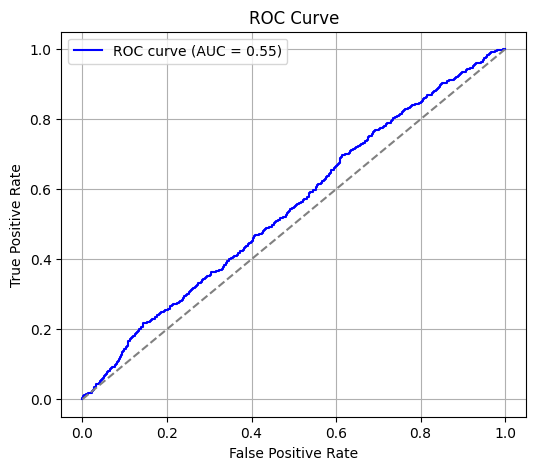

In [241]:
# y_prob = model.predict_proba(X_test_scaled)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# # --- Find best threshold for max accuracy ---
# best_acc = 0
# best_thresh = 0.5
# for thresh in thresholds:
#     y_pred_custom = (y_prob >= thresh).astype(int)
#     acc = accuracy_score(y_test, y_pred_custom)
#     if acc > best_acc:
#         best_acc = acc
#         best_thresh = thresh

# print(f"Best threshold: {best_thresh:.4f}")
# print(f"Accuracy at best threshold: {best_acc:.4f}")
y_prob = gbm.predict(X_test_scaled, num_iteration=gbm.best_iteration)

y_pred_best = (y_prob >= 0.5182).astype(int)

# Evaluate
acc = accuracy_score(y_test, y_pred_best)
cm = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

y_pred = (y_prob >= 0.5).astype(int)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (best threshold): {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


# --- Plot ROC curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()